# Data Preprocessing
Transforming raw data into a clean and usable format for training machine learning models. It involves cleaning, transforming, and structuring data to remove noise, handle missing values, and make it suitable for algorithms to learn effectively.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
# Load the combined dataset
df = pd.read_csv('../data/combined_dataset.csv')
df.head()

,Accession,Collection_Year,Combined_Sequence,Avg_Temp_C,CO2_Emission_Mt
0,PV554916.1,2024,GACAAAGACAGATTCTTTGAGGAAGCTAAGCTTAACGTAGTTCTAA...,26.16,2489.9
1,PV554917.1,2024,GACAAAGACAGATTCTTTGAGGAAGCTAAGCTTAACGTAGTTCTAA...,26.16,2489.9
2,PV554918.1,2024,CCGACAAAGACAGATTCTTTGAGGAAGCTAAGCTTAACGTAGTTCT...,26.16,2489.9
3,PV554919.1,2024,GACAAGAACAGTTTCGACTCGGAAGCTTGCTTAACGTAGTGCTAAC...,26.16,2489.9
4,PV554920.1,2024,GACAAAGACAGATTCTTTGAGGAAGCTAAGCTTAACGTAGTTCTAA...,26.16,2489.9


In [3]:
# Display the shape of the DataFrame (rows, columns)
print("Dataset shape:", df.shape)

Dataset shape: (395, 5)


### Remove unnecessary columns

In [4]:
# Keep only the required columns
df = df[['Combined_Sequence', 'Avg_Temp_C', 'CO2_Emission_Mt']]
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Combined_Sequence', 'Avg_Temp_C', 'CO2_Emission_Mt']


In [5]:
df.head()

,Combined_Sequence,Avg_Temp_C,CO2_Emission_Mt
0,GACAAAGACAGATTCTTTGAGGAAGCTAAGCTTAACGTAGTTCTAA...,26.16,2489.9
1,GACAAAGACAGATTCTTTGAGGAAGCTAAGCTTAACGTAGTTCTAA...,26.16,2489.9
2,CCGACAAAGACAGATTCTTTGAGGAAGCTAAGCTTAACGTAGTTCT...,26.16,2489.9
3,GACAAGAACAGTTTCGACTCGGAAGCTTGCTTAACGTAGTGCTAAC...,26.16,2489.9
4,GACAAAGACAGATTCTTTGAGGAAGCTAAGCTTAACGTAGTTCTAA...,26.16,2489.9


### Check and handle missing values

In [6]:
# Check for missing values in each column
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Combined_Sequence    0
Avg_Temp_C           0
CO2_Emission_Mt      0
dtype: int64


**Insights**

The data has no missing values (handled during ingestion).

### Check for variable-length in genomic sequence

In [7]:
# Calculate the length of each sequence
seq_lengths_df = pd.DataFrame({
    'Sequence_Length': df['Combined_Sequence'].str.len()
})
seq_lengths_df.head()

,Sequence_Length
0,1780
1,1780
2,1804
3,1774
4,1780


In [8]:
# Display summary statistics
print(seq_lengths_df['Sequence_Length'].describe())

count     395.000000
mean     1923.850633
std        87.126552
min      1577.000000
25%      1863.000000
50%      1951.000000
75%      1999.000000
max      2056.000000
Name: Sequence_Length, dtype: float64


In [9]:
# Show all unique sequence lengths
print("Unique sequence lengths:", seq_lengths_df['Sequence_Length'].unique())

Unique sequence lengths: [1780 1804 1774 1853 1798 1916 1912 1876 1785 1902 1897 1977 1976 1947
 1942 1828 1955 1949 1954 1953 1951 1935 1952 1961 1956 1717 1966 1588
 1613 1786 1957 1968 1905 1860 1990 1974 1991 1982 1980 1927 1887 1872
 1924 1803 1903 2002 1992 2000 1971 1979 1978 1981 1983 1987 1995 1996
 2003 1994 2001 1998 1973 1937 1917 1891 1911 1885 1852 1849 1856 1861
 1851 1859 2023 2013 2005 1848 1890 1854 1870 2027 1941 1880 1878 2015
 1999 1838 1984 2011 2014 1969 2004 2012 2008 1962 1928 1915 1898 1936
 1933 1989 1811 2006 1658 1723 1704 1719 1883 1877 1825 1831 1850 1863
 1833 1943 1799 1906 1796 1801 1797 1768 1805 1939 1862 1781 1866 1795
 1972 1960 1950 1889 2029 1834 1810 1817 1761 1637 1749 1728 1864 1727
 2026 2056 1695 1738 1802 2018 1923 1815 1929 1824 1907 2028 1577 1920
 1893 1959 1881 1926 1934 1944 1895 1627 2019 1964 1940 1931 1967 1918
 1908 2031 2007 1986]


**Insights**
- Dataset contains 395 sequences.
- Sequence lengths range from 1577 to 2056 nucleotides.
- There are many different lengths (not a single fixed length).
- The majority are between about 1863 and 1999 nucleotides (quartiles).

In [10]:
# Count of sequences with length exactly 2056 (Max)
num_2056 = (seq_lengths_df['Sequence_Length'] == 2056).sum()
print(f"Number of sequences with length 2056: {num_2056}")

Number of sequences with length 2056: 2


In [11]:
# Count of sequences with length exactly 1577 (Min)
num_1577 = (seq_lengths_df['Sequence_Length'] == 1577).sum()
print(f"Number of sequences with length 1577: {num_1577}")

Number of sequences with length 1577: 1


In [12]:
# Count of sequences with length >= 1900
num_1900_plus = (seq_lengths_df['Sequence_Length'] >= 1900).sum()
print(f"Number of sequences with length >= 1900: {num_1900_plus}")

Number of sequences with length >= 1900: 260


In [13]:
# Count of sequences with length >= 1800
num_1800_plus = (seq_lengths_df['Sequence_Length'] >= 1800).sum()
print(f"Number of sequences with length >= 1800: {num_1800_plus}")

Number of sequences with length >= 1800: 359


In [14]:
# Get highest frequency
top_10_lengths = seq_lengths_df['Sequence_Length'].value_counts().head(10)

print("Top 10 most frequent sequence lengths:")
print(top_10_lengths)

Top 10 most frequent sequence lengths:
Sequence_Length
2015    21
2027    16
1999    11
1954    10
1860     8
2006     8
1955     7
2001     7
1804     6
2005     6
Name: count, dtype: int64


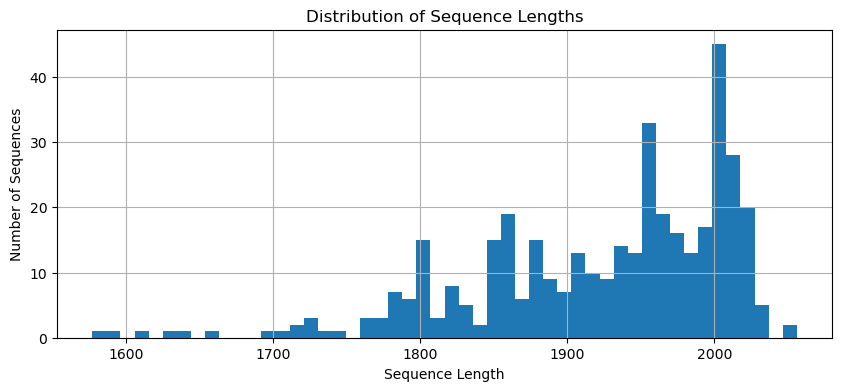

In [15]:
plt.figure(figsize=(10,4))
seq_lengths_df['Sequence_Length'].hist(bins=50)
plt.xlabel('Sequence Length')
plt.ylabel('Number of Sequences')
plt.title('Distribution of Sequence Lengths')
plt.show()

**Insights**
- Sequences ≥ 1800 nt: 359 (about 91% of data)
- Sequences ≥ 1900 nt: 260
- Most common sequence length: 2015 (appears 21 times)
- Very long (2056 nt) and very short (1577 nt) sequences are rare (only 2 and 1, respectively)

**Solution**
1. Remove sequences shorter than 1800 nt
2. Truncate sequences longer than 2015 nt to 2015 nt
3. Pad sequences shorter than 2015 nt with a special value

**Justification**
- Preserves Most of Data
- Reduces Outlier Impact
- Aligns With Biological and ML Standards
- Minimizes Information Loss
- Ensures Compatibility With ML Algorithms

## Handle variable-length in genomic sequence

###  Filter out all shorter sequences

In [16]:
# Filter out sequences shorter than 1800 nt
filtered_df = df[df['Combined_Sequence'].str.len() >= 1800].reset_index(drop=True)

# Check the new shape and minimum sequence length to confirm filtering
print("Shape after filtering:", filtered_df.shape)
print("Minimum sequence length:", filtered_df['Combined_Sequence'].str.len().min())

Shape after filtering: (359, 3)
Minimum sequence length: 1801


### Truncate longer sequences

In [17]:
# Truncate sequences longer than 2015 nt

def truncate_sequence(seq, max_length=2015):
    return seq[:max_length] if len(seq) > max_length else seq

# Apply truncation to each sequence
filtered_df['Combined_Sequence'] = filtered_df['Combined_Sequence'].apply(truncate_sequence)

# Check that max sequence length is now 2015
print("Max sequence length after truncation:", filtered_df['Combined_Sequence'].str.len().max())

Max sequence length after truncation: 2015


### Pad shorter sequences with 'N'

In [18]:
# Pad sequences shorter than 2015 nt with 'N'

def pad_sequence(seq, target_length=2015, pad_char='N'):
    return seq.ljust(target_length, pad_char)

# Apply padding to each sequence
filtered_df['Combined_Sequence'] = filtered_df['Combined_Sequence'].apply(pad_sequence)

# Confirm all sequences are now the same length
lengths_after_padding = filtered_df['Combined_Sequence'].str.len().unique()
print("Unique sequence lengths after padding:", lengths_after_padding)

Unique sequence lengths after padding: [2015]


## Sequence Expansion

### Expand each sequence into separate columns

In [19]:
# Split each sequence into a list of characters (nucleotides)
seq_expanded = filtered_df['Combined_Sequence'].apply(lambda x: list(x))

# Convert the lists into a DataFrame
seq_df = pd.DataFrame(seq_expanded.tolist(), columns=[f'p_{i+1}' for i in range(2015)])

# Concatenate environmental variables with the expanded sequence columns
final_df = pd.concat([filtered_df[['Avg_Temp_C', 'CO2_Emission_Mt']], seq_df], axis=1)

# Quick check of the result
print("Final DataFrame shape:", final_df.shape)
final_df.head()

Final DataFrame shape: (359, 2017)


,Avg_Temp_C,CO2_Emission_Mt,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,...,p_2006,p_2007,p_2008,p_2009,p_2010,p_2011,p_2012,p_2013,p_2014,p_2015
0,26.16,2489.9,C,C,G,A,C,A,A,A,...,N,N,N,N,N,N,N,N,N,N
1,26.16,2489.9,G,A,C,A,A,G,A,A,...,N,N,N,N,N,N,N,N,N,N
2,26.16,2489.9,G,A,C,A,A,G,A,A,...,N,N,N,N,N,N,N,N,N,N
3,26.16,2489.9,G,A,C,A,A,G,A,A,...,N,N,N,N,N,N,N,N,N,N
4,26.16,2489.9,C,G,T,G,G,A,C,C,...,N,N,N,N,N,N,N,N,N,N


## Nucleotide Encoding

### Encode nucleotides A/T/G/C/N to 1/2/3/4/0

**Insights**
- Observed null values (NaN)
- All values are float

**Solution**
- Update encoding dictionary to handle all ambiguous bases by mapping everything else to 0 (same as padding/unknown).
- Convert columns to integer type for ML compatibility.

In [20]:
# Re-define encoding function to default to 0 for unknown bases
def encode_nucleotide(nuc):
    return {'A': 1, 'T': 2, 'G': 3, 'C': 4, 'N': 0}.get(nuc, 0)

# Get list of all sequence column names (from p_1 to p_2015)
seq_cols = [f'p_{i+1}' for i in range(2015)]

# Apply to all sequence columns (vectorized for performance)
for col in seq_cols:
    final_df[col] = final_df[col].apply(encode_nucleotide).astype(int)

In [21]:
final_df[seq_cols[:20]].head(20)

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12,p_13,p_14,p_15,p_16,p_17,p_18,p_19,p_20
0,4,4,3,1,4,1,1,1,3,1,4,1,3,1,2,2,4,2,2,2
1,3,1,4,1,1,3,1,1,4,1,3,2,2,2,4,3,1,4,2,4
2,3,1,4,1,1,3,1,1,4,1,3,2,2,2,4,3,1,4,2,4
3,3,1,4,1,1,3,1,1,4,1,3,2,2,2,4,3,1,4,2,4
4,4,3,2,3,3,1,4,4,3,1,4,1,1,1,3,1,4,1,3,1
5,4,3,2,3,3,1,4,4,3,1,4,1,1,1,3,1,4,1,3,1
6,3,1,4,4,3,1,4,1,1,1,3,1,4,1,3,1,2,2,4,2
7,1,4,4,3,1,4,1,1,1,3,1,4,1,3,1,2,2,4,2,2
8,3,1,4,1,1,1,3,1,4,1,3,1,2,2,4,2,2,2,3,1
9,3,1,4,1,1,1,3,1,4,1,3,1,2,2,4,2,2,2,3,1


### Save preprocessed dataset

In [22]:
final_df.to_csv('../data/processed_genomic_dataset.csv', index=False)
print("Preprocessed data saved to '../data/processed_genomic_dataset.csv'")

Preprocessed data saved to '../data/processed_genomic_dataset.csv'
